# VGG16 Model

# VGG16 Model Overview

## Introduction

The VGG16 model refers to a Convolutional Neural Network (CNN) that has 16 layers. It was proposed by the University of Oxford and published in the paper, "Very Deep Convolutional Networks for Large-Scale Image Recognition" by K. Simonyan and A. Zisserman. [1]

## Architecture

It has 16 layers, including 13 convolutional layers, and 3 fully connected layers. It is renowned for its simplicity and effectiveness. It is great for tasks such as image classification and object recognition. 



## Implementation

Here's a simple code snippet for loading the VGG16 model using TensorFlow's Keras API:

```python
from tensorflow.keras.applications import VGG16

# Load the VGG16 model, pre-trained on ImageNet
model = VGG16(weights='imagenet')



# Import Necessary Modules

In [16]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import recall_score, f1_score
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings('ignore',category=DeprecationWarning)

## Building Helper Functions

In [17]:
'''
This function `create_dataframe_from_directory` takes two parameters `data_dir` and `label`. 
It reads files from the specified directory `data_dir`, assigns the given `label` to each file, 
and then creates a pandas DataFrame with two columns: 'filename' containing the file paths and 'label' containing the assigned labels.
'''

def create_dataframe_from_directory(data_dir, label):
    filenames = []
    labels = []
    if os.path.isdir(data_dir):
        for filename in os.listdir(data_dir):
            file_path = os.path.join(data_dir, filename)
            if os.path.isfile(file_path):
                filenames.append(file_path)
                labels.append(label)
    return pd.DataFrame({
        'filename': filenames,
        'label': labels
    })

## Fetching the Data

In [18]:
base_path = "C:\\Users\\mabdu\\Documents\\Final Year Project\\Lung Segmentation Data\\Lung Segmentation Data"
directories = ['Val', 'Test', 'Train']
categories = ['COVID-19', 'Non-COVID', 'Normal']

dataframes = {}

for directory in directories:
    for category in categories:
        folder_path = os.path.join(base_path, directory, category, 'images')
        data = create_dataframe_from_directory(folder_path, category)
        key = f"{category}_{directory}"
        dataframes[key] = data
        print(f"{category} Data length ({directory}): {len(data)}")
        print()

all_data = pd.concat(dataframes, ignore_index=True)
print(len(all_data))

COVID-19 Data length (Val): 1903

Non-COVID Data length (Val): 1802

Normal Data length (Val): 1712

COVID-19 Data length (Test): 2395

Non-COVID Data length (Test): 2253

Normal Data length (Test): 2140

COVID-19 Data length (Train): 7658

Non-COVID Data length (Train): 7208

Normal Data length (Train): 6849

33920


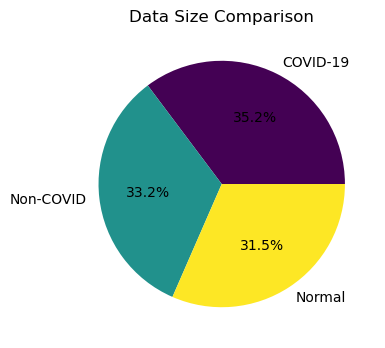

In [19]:
lengths = all_data['label'].value_counts()

cmap = plt.get_cmap('viridis')

# Generate a color range within the chosen cmap
# linspace generates a range of values from 0 to 1 for the color map
colors = cmap(np.linspace(0, 1, len(categories)))


plt.figure(figsize=(7, 4))
plt.pie(lengths, labels=categories, colors=colors, autopct='%1.1f%%')

# Add title and labels
plt.title('Data Size Comparison')

# Show the graph
plt.show()

In [20]:
all_data['label'].unique()

array(['COVID-19', 'Non-COVID', 'Normal'], dtype=object)

## Looking at the X-Rays

### COVID-19 X-Ray

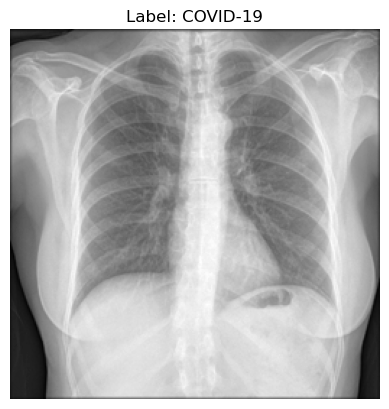

In [21]:
covid1 = all_data.iloc[0]
c1_image = Image.open(covid1['filename'])
c1_label = covid1['label']  # Get the actual label from the DataFrame

# Plot the image
plt.imshow(c1_image, cmap='gray')
plt.title(f"Label: {c1_label}")  # Use the label from the DataFrame
plt.axis('off')  # Hide the axis
plt.show()


## Normal X-Ray

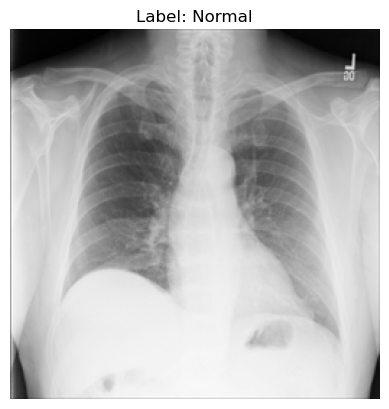

In [22]:
normal_instance = all_data.loc[all_data['label'] == 'Normal'].iloc[0]
n_image = Image.open(normal_instance['filename'])
n_label = normal_instance['label']

# Now plot the image
plt.imshow(n_image, cmap='gray')
plt.title(f"Label: {n_label}")
plt.axis('off')
plt.show()


## Non-COVID-19 X-Ray

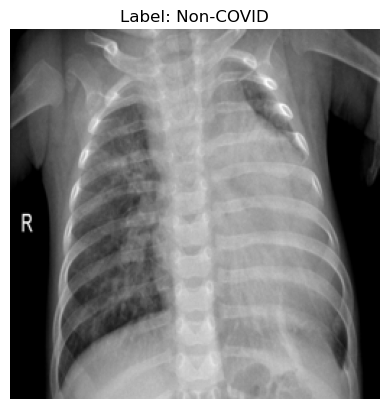

In [23]:
non_instance = all_data.loc[all_data['label'] == 'Non-COVID'].iloc[0]
non_image = Image.open(non_instance['filename'])
non_label = non_instance['label']

# Now plot the image
plt.imshow(non_image, cmap='gray')
plt.title(f"Label: {non_label}")
plt.axis('off')
plt.show()


## Getting the data ready

In [24]:
# Splitting the data into 70% training and 30% temporary (test + validation)
train_data, temp_data = train_test_split(all_data, test_size=0.3, random_state=42)

# Splitting the temporary data into 66.7% testing and 33.3% validation
# This results in 20% testing and 10% validation of the original data
test_data, val_data = train_test_split(temp_data, test_size=0.33, random_state=42)

In [25]:
datagen = ImageDataGenerator(rescale=1./255)

image_height = 224
image_width = 224
batch_size = 64


train_generator = datagen.flow_from_dataframe(
    dataframe = train_data,
    x_col = 'filename',
    y_col = 'label',
    class_mode = 'categorical',
    target_size = (image_height,image_width),
    batch_size = batch_size,
    color_mode = 'rgb'
    )

test_generator = datagen.flow_from_dataframe(
    dataframe = test_data,
    x_col = 'filename',
    y_col = 'label',
    class_mode = 'categorical',
    target_size = (image_height,image_width),
    batch_size = batch_size,
    color_mode = 'rgb',
    shuffle = False,
    )

validation_generator = datagen.flow_from_dataframe(
    dataframe = val_data,
    x_col = 'filename',
    y_col = 'label',
    class_mode = 'categorical',
    target_size = (image_height,image_width),
    batch_size = batch_size,
    color_mode = 'rgb'
    )



Found 23744 validated image filenames belonging to 3 classes.
Found 6817 validated image filenames belonging to 3 classes.
Found 3359 validated image filenames belonging to 3 classes.


In [26]:
## Looking at how data is split
# Count samples in each class for the training set
train_class_counts = train_data['label'].value_counts()
print("Training set counts per class:\n", train_class_counts)

# Count samples in each class for the validation set
validation_class_counts = val_data['label'].value_counts()
print("\nValidation set counts per class:\n", validation_class_counts)

# Count samples in each class for the test set
test_class_counts = test_data['label'].value_counts()
print("\nTest set counts per class:\n", test_class_counts)


Training set counts per class:
 label
COVID-19     8377
Non-COVID    7916
Normal       7451
Name: count, dtype: int64

Validation set counts per class:
 label
COVID-19     1189
Non-COVID    1092
Normal       1078
Name: count, dtype: int64

Test set counts per class:
 label
COVID-19     2390
Non-COVID    2255
Normal       2172
Name: count, dtype: int64


## Building the Model (VGG16)

In [28]:
conv_base = tf.keras.applications.VGG16(
    include_top=False,
    weights='imagenet',
    input_shape=(224, 224, 3),
    pooling='max'
    )

model = Sequential([
   conv_base,
   Dense(64,activation='relu'),
   Dropout(0.5),
   Dense(3, activation='softmax')  # 3 for three classes (COVID, Non-COVID, Normal)
])

model.compile(
    optimizer=tf.keras.optimizers.legacy.Adam(),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 512)               14714688  
                                                                 
 dense_2 (Dense)             (None, 64)                32832     
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 3)                 195       
                                                                 
Total params: 14747715 (56.26 MB)
Trainable params: 14747715 (56.26 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [29]:
print(f"This is the number of trainable weights before freezing the conv base: {len(model.trainable_weights)}")

conv_base.trainable = False

print(f"This is the number of trainable weights after freezing the conv base: {len(model.trainable_weights)}")

This is the number of trainable weights before freezing the conv base: 30
This is the number of trainable weights after freezing the conv base: 4


In [30]:
# Evaluating the model on the test set before training
initial_test_loss, initial_test_accuracy = model.evaluate(test_generator)
print('Initial Test accuracy:', initial_test_accuracy)

107/107 [==============================] - 279s 3s/step - loss: 1.2948 - accuracy: 0.3689
Initial Test accuracy: 0.3689306080341339


In [31]:
# Training the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.n // train_generator.batch_size,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.n // validation_generator.batch_size
)

Epoch 1/10
371/371 [==============================] - 4846s 13s/step - loss: 0.9562 - accuracy: 0.5296 - val_loss: 0.6161 - val_accuracy: 0.7380
Epoch 2/10
371/371 [==============================] - 4800s 13s/step - loss: 0.6215 - accuracy: 0.7429 - val_loss: 0.4857 - val_accuracy: 0.8038
Epoch 3/10
371/371 [==============================] - 4773s 13s/step - loss: 0.5024 - accuracy: 0.8081 - val_loss: 0.4693 - val_accuracy: 0.8059
Epoch 4/10
371/371 [==============================] - 4775s 13s/step - loss: 0.4290 - accuracy: 0.8372 - val_loss: 0.3521 - val_accuracy: 0.8606
Epoch 5/10
371/371 [==============================] - 4770s 13s/step - loss: 0.3820 - accuracy: 0.8592 - val_loss: 0.3088 - val_accuracy: 0.8735
Epoch 6/10
371/371 [==============================] - 4774s 13s/step - loss: 0.3623 - accuracy: 0.8659 - val_loss: 0.2846 - val_accuracy: 0.8984
Epoch 7/10
371/371 [==============================] - 4775s 13s/step - loss: 0.3270 - accuracy: 0.8824 - val_loss: 0.2696 - val_ac

In [32]:
# Evaluating the model on the test set after training
final_test_loss, final_test_accuracy = model.evaluate(test_generator)
print('Final Test accuracy:', final_test_accuracy)

107/107 [==============================] - 319s 3s/step - loss: 0.2836 - accuracy: 0.8942
Final Test accuracy: 0.8942350149154663


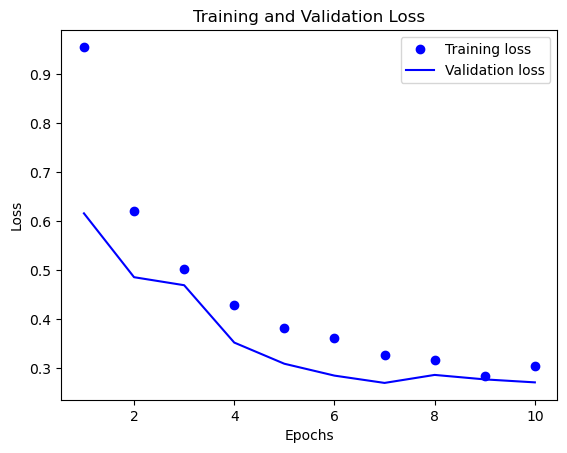

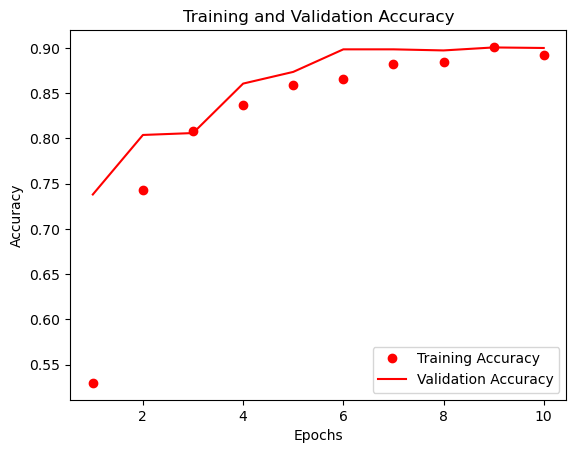

In [33]:
# Extracting data from the history object
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
epochs = range(1, len(training_loss) + 1)

# Plotting training and validation loss
plt.figure()
plt.plot(epochs, training_loss, 'bo', label='Training loss')
plt.plot(epochs, validation_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()


if 'accuracy' in history.history:
    training_accuracy = history.history['accuracy']
    validation_accuracy = history.history['val_accuracy']

    plt.figure()
    plt.plot(epochs, training_accuracy, 'ro', label='Training Accuracy')
    plt.plot(epochs, validation_accuracy, 'r', label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

plt.show()

In [34]:
# 1. Generate Predictions
predictions = model.predict(test_generator, steps=test_generator.n // test_generator.batch_size)

# 2. Convert Predictions to Class Labels
predicted_classes = np.argmax(predictions, axis=1)

# Ensure the length of true_classes matches that of predicted_classes
# This is important as the generator could loop indefinitely
true_classes = test_generator.classes
true_classes = true_classes[:len(predicted_classes)]

# 3. Calculate F1 Score
f1 = f1_score(true_classes, predicted_classes, average='weighted')
print(f"F1-Score: {f1}")

recall = recall_score(true_classes, predicted_classes, average='macro')
print(f"Recall: {recall}")

106/106 [==============================] - 327s 3s/step
F1-Score: 0.8939189710141043
Recall: 0.8930306060327737


In [35]:
report = classification_report(true_classes, predicted_classes, target_names=test_generator.class_indices.keys())
print(report)

              precision    recall  f1-score   support

    COVID-19       0.94      0.96      0.95      2378
   Non-COVID       0.90      0.83      0.86      2248
      Normal       0.85      0.89      0.87      2158

    accuracy                           0.89      6784
   macro avg       0.89      0.89      0.89      6784
weighted avg       0.89      0.89      0.89      6784



# References
[1] “Understanding VGG16: Concepts, architecture, and performance,” Datagen, https://datagen.tech/guides/computer-vision/vgg16/# (accessed Apr. 1, 2024). 